<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [10]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


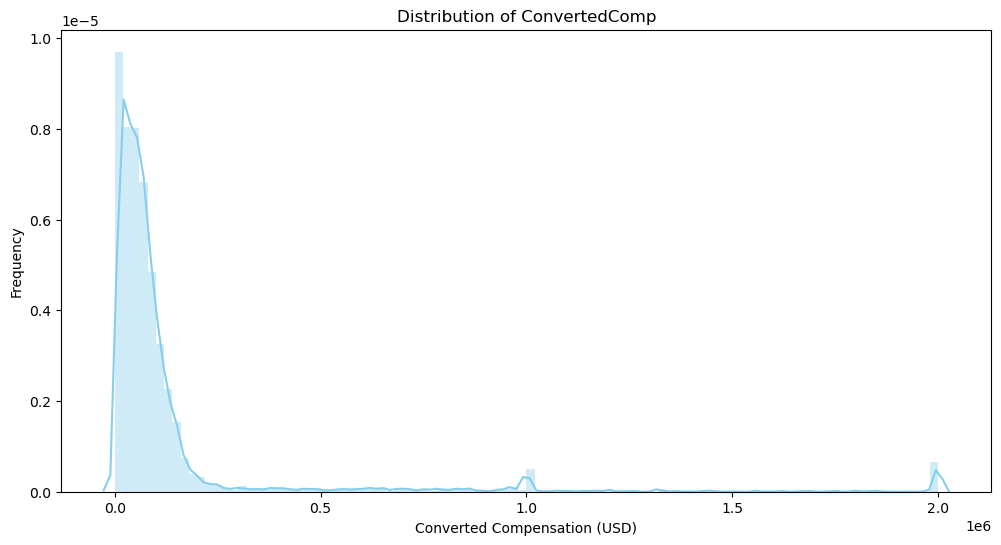

In [17]:
# Plot the distribution curve for ConvertedComp using seaborn
plt.figure(figsize=(12, 6))
sns.distplot(df['ConvertedComp'].dropna(), kde=True, bins=100, color='skyblue')
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

Plot the histogram for the column `ConvertedComp`.


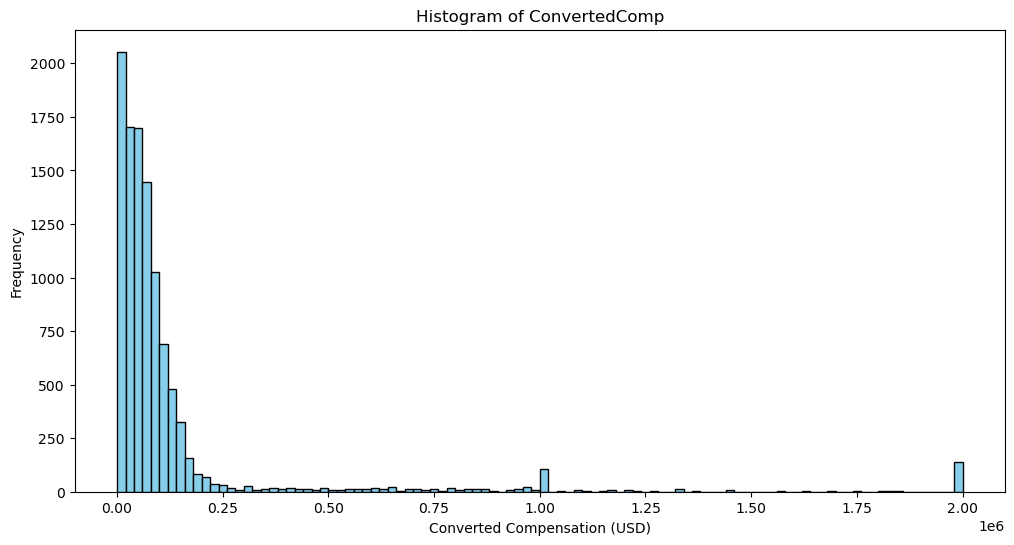

In [19]:
# Plot the histogram for ConvertedComp
plt.figure(figsize=(12, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()



What is the median of the column `ConvertedComp`?


In [35]:
median_converted_comp = df['ConvertedComp'].median()
print(f"The median of the column ConvertedComp is: {median_converted_comp}")

median_age = df['Age'].median()
print(f"The median age of survey respondents is: {median_age}")



The median of the column ConvertedComp is: 57745.0
The median age of survey respondents is: 29.0


How many responders identified themselves only as a **Man**?


In [33]:
man_only_count = df[df['Gender'] == 'Man']['Gender'].count()
print(f"Number of responders identifying only as a Man: {man_only_count}")


Number of responders identifying only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [34]:
median_woman_comp = df[df['Gender'] == 'Woman']['ConvertedComp'].median()

print(f"The median ConvertedComp for responders identifying only as a Woman is: {median_woman_comp}")


The median ConvertedComp for responders identifying only as a Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [21]:
five_number_summary_age = df['Age'].describe(percentiles=[.25, .5, .75])
print("Five-Number Summary for Age:")
print(five_number_summary_age[['min', '25%', '50%', '75%', 'max']])


Five-Number Summary for Age:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


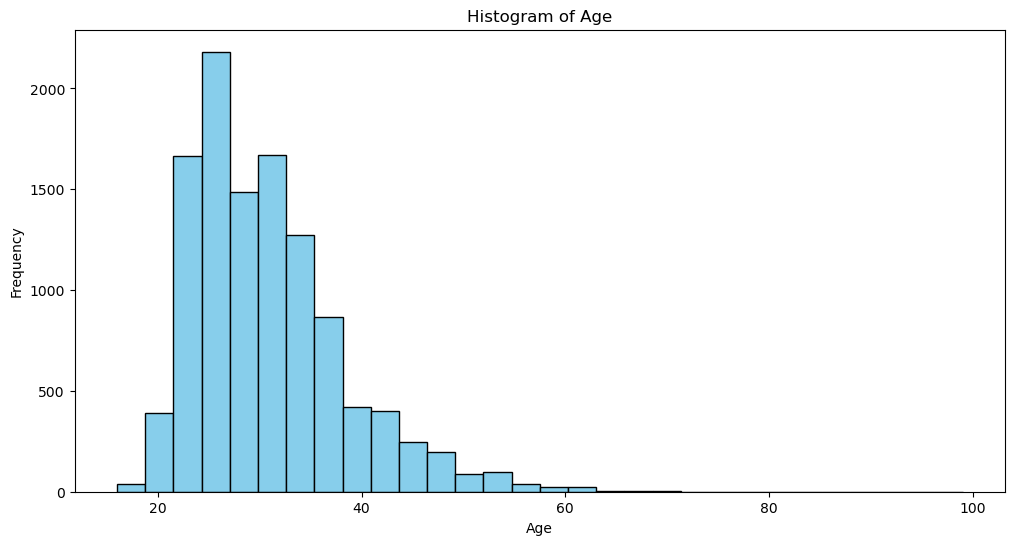

In [22]:
# Plot the histogram for the 'Age' column
df['Age'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', figsize=(12, 6))

# Set labels and title
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


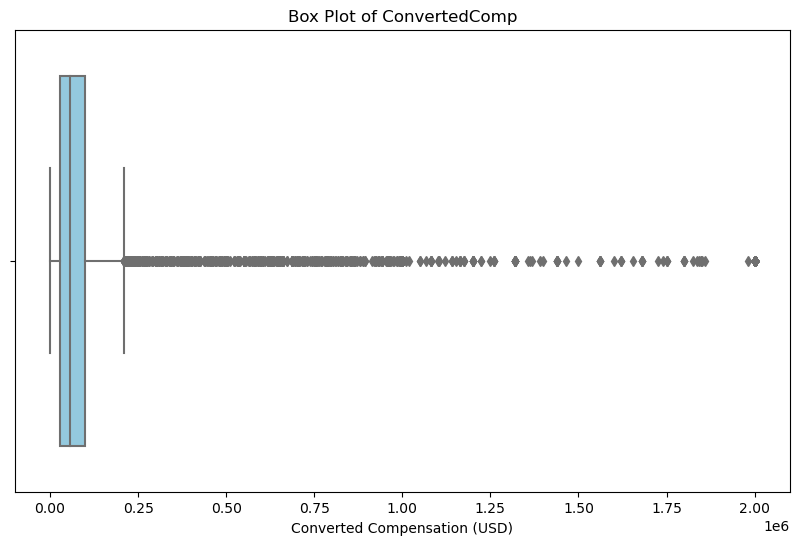

The median ConvertedComp before removing outliers is: 57745.0


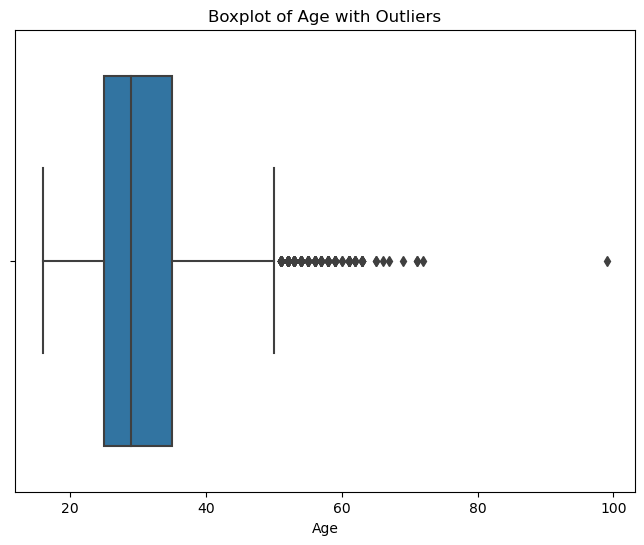

In [40]:
# Create a box plot for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'], color='skyblue')

# Set labels and title
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')

# Show the plot
plt.show()

median_converted_comp_before_outliers = df['ConvertedComp'].median()

print(f"The median ConvertedComp before removing outliers is: {median_converted_comp_before_outliers}")

# Create a boxplot for the 'Age' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])

# Set plot labels and title
plt.xlabel('Age')
plt.title('Boxplot of Age with Outliers')

# Show the plot
plt.show()




Find out the Inter Quartile Range for the column `ConvertedComp`.


In [24]:
# Calculate the Interquartile Range (IQR) for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Print the result
print(f"Interquartile Range (IQR) for ConvertedComp: {IQR}")


Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [25]:
# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the results
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [26]:
# Identify outliers in 'ConvertedComp'
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

# Print the result
print(f"Number of outliers in 'ConvertedComp': {num_outliers}")


Number of outliers in 'ConvertedComp': 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [41]:
# Remove outliers from 'ConvertedComp'
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print success message
print("DataFrame without outliers created successfully")

# The median after removing outliers
median_converted_comp_after_outliers = df_no_outliers['ConvertedComp'].median()
print(f"The median ConvertedComp after removing outliers is: {median_converted_comp_after_outliers}")


mean_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].mean()
print(f"The mean ConvertedComp after removing outliers is: {mean_converted_comp_no_outliers}")


DataFrame without outliers created successfully
The median ConvertedComp after removing outliers is: 52704.0
The mean ConvertedComp after removing outliers is: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [30]:
age_corr = df.corr()['Age']
print(age_corr)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
